# Inspect cross-validation results

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#plt.style.use("huddlej")

In [3]:
def matthews_correlation_coefficient(tp, tn, fp, fn):
    """Return Matthews correlation coefficient for values from a confusion matrix.
    Implementation is based on the definition from wikipedia:

    https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
    """
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
            denominator = 1

    return float(numerator) / denominator

def accuracy(tp, tn, fp, fn):
    return (tp + tn) / float(tp + tn + fp + fn)

In [4]:
df = pd.read_table("lbi_results.tsv")

In [5]:
df

,fn,fp,last_training_timepoint,mae,parameters,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,predictors
0,0,9,2011.25,0.288974,0.198538,2012.25,0.685994,0.838357,16,25,0.428682,0.286857,9,lbi
1,0,2,2011.75,0.260716,0.174540,2012.75,0.936927,0.876398,33,27,0.421206,0.263155,10,lbi
2,1,0,2012.25,0.119476,0.435214,2013.25,0.956365,0.861505,15,40,0.494953,0.407854,11,lbi
3,10,21,2012.75,0.128511,0.633021,2013.75,-0.401610,-0.688850,0,21,0.556773,0.517010,12,lbi
4,4,24,2013.25,0.278379,0.673323,2014.25,-0.235865,-0.519599,6,5,0.596581,0.532318,13,lbi
5,4,20,2013.75,0.527373,0.645223,2014.75,0.055279,0.063667,8,13,0.525425,0.497409,14,lbi
6,0,3,2014.25,0.119241,0.623342,2015.25,0.868496,0.778727,22,18,0.474332,0.449229,15,lbi
7,4,29,2014.75,0.105612,0.563209,2015.75,-0.766667,-0.540140,1,1,0.445766,0.400737,16,lbi
8,3,14,2015.25,0.100478,0.599538,2016.25,0.183394,0.633969,9,11,0.464800,0.415988,17,lbi
9,6,18,2015.75,0.073602,0.596998,2016.75,-0.242761,0.632393,1,20,0.421510,0.411098,18,lbi


In [6]:
confusion_matrix = df.loc[:, ["tn", "tp", "fn", "fp"]].sum()

In [7]:
confusion_matrix

tn    114
tp    210
fn     32
fp    152
dtype: int64

In [8]:
matthews_correlation_coefficient(**confusion_matrix.to_dict())

0.32704544087523385

In [9]:
accuracy(**confusion_matrix.to_dict())

0.6377952755905512

In [10]:
df["parameters"]

0     0.198538
1     0.174540
2     0.435214
3     0.633021
4     0.673323
5     0.645223
6     0.623342
7     0.563209
8     0.599538
9     0.596998
10    0.574206
Name: parameters, dtype: float64

In [12]:
df.loc[:, ["parameters", "testing_accuracy", "testing_correlation", "mae"]].aggregate(["mean", "median", "std"])

,parameters,testing_accuracy,testing_correlation,mae
mean,0.519741,0.219606,0.309952,0.197232
median,0.596998,0.183394,0.632393,0.128511
std,0.175946,0.594023,0.618762,0.133723


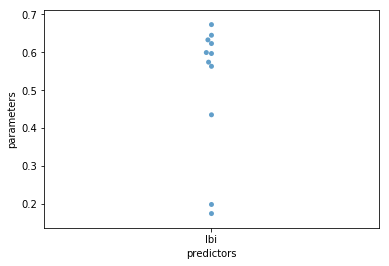

In [13]:
sns.swarmplot(x="predictors", y="parameters", data=df, alpha=0.7)

(-1, 1)

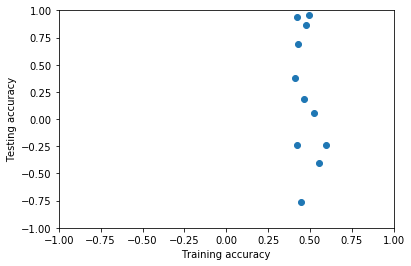

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["training_accuracy"], df["testing_accuracy"])
ax.set_xlabel("Training accuracy")
ax.set_ylabel("Testing accuracy")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

(-1, 1)

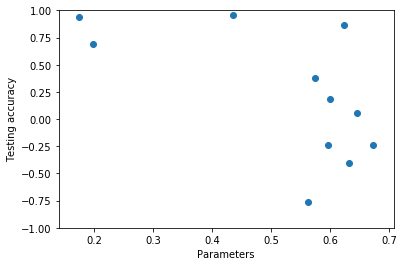

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["parameters"], df["testing_accuracy"])
ax.set_xlabel("Parameters")
ax.set_ylabel("Testing accuracy")
#ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

(-1, 1)

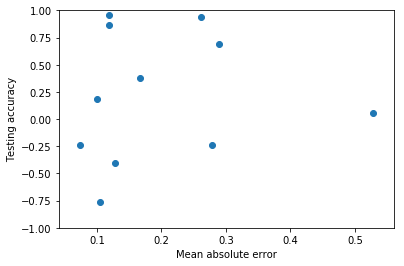

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["mae"], df["testing_accuracy"])
ax.set_xlabel("Mean absolute error")
ax.set_ylabel("Testing accuracy")
#ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

(-1, 1)

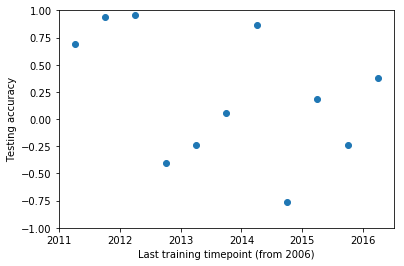

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["last_training_timepoint"], df["testing_accuracy"])
ax.set_xlabel("Last training timepoint (from 2006)")
ax.set_ylabel("Testing accuracy")
#ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

Text(0,0.5,'Model parameter (LBI)')

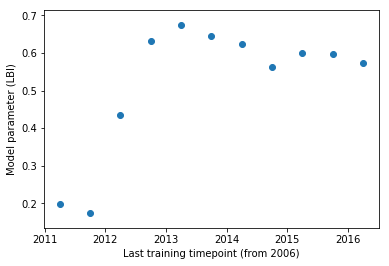

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["last_training_timepoint"], df["parameters"])
ax.set_xlabel("Last training timepoint (from 2006)")
ax.set_ylabel("Model parameter (LBI)")

In [18]:
df["season"] = df["test_timepoint"].apply(lambda timepoint: timepoint % 1 == 0.75 and "winter" or "summer")

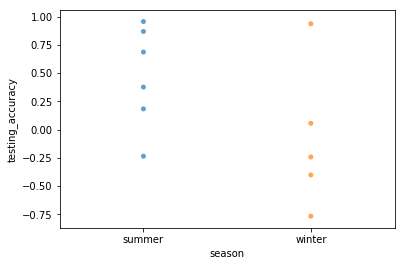

In [19]:
sns.swarmplot(x="season", y="testing_accuracy", data=df, alpha=0.7)

(0, 0.5652382618981061)

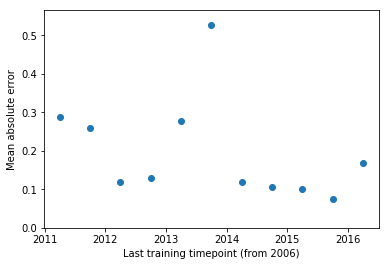

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["last_training_timepoint"], df["mae"])
ax.set_xlabel("Last training timepoint (from 2006)")
ax.set_ylabel("Mean absolute error")
ax.set_ylim(0)

/Users/jlhudd/miniconda3/envs/nextstrain/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 0.5937089304932134)

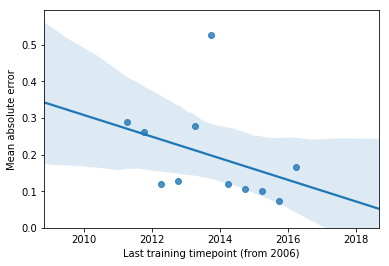

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.regplot("last_training_timepoint", "mae", data=df, ax=ax)
ax.set_xlabel("Last training timepoint (from 2006)")
ax.set_ylabel("Mean absolute error")
ax.set_ylim(0)

(-1, 1)

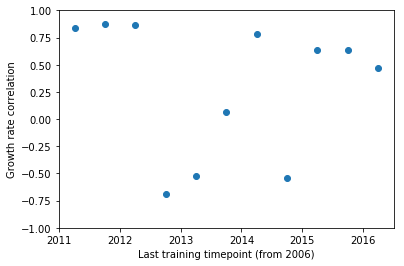

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["last_training_timepoint"], df["testing_correlation"])
ax.set_xlabel("Last training timepoint (from 2006)")
ax.set_ylabel("Growth rate correlation")
ax.set_ylim(-1, 1)

## Overall model validation results

In [157]:
df = pd.read_table("model_validation.tab", keep_default_na=False, na_values="N/A")

In [158]:
df.head()

,fn,fp,last_training_timepoint,mae,parameter-cTiterSub,parameter-dms,parameter-ep,parameter-ep_x,parameter-lbi,parameter-ne,...,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,viruses,year_range
0,0,40,2011.25,0.345735,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.25,0.0,0.054529,0,52,0.074047,0.047025,9,92,2006-2018
1,49,0,2011.75,0.360557,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.75,0.0,-0.019286,44,0,0.059723,0.017684,10,92,2006-2018
2,0,16,2012.25,0.151325,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.25,0.0,0.236188,0,46,0.115534,0.049208,11,92,2006-2018
3,0,19,2012.75,0.079991,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.75,0.0,-0.036657,0,33,0.034892,0.021100,12,92,2006-2018
4,0,24,2013.25,0.319706,NaN,NaN,NaN,NaN,NaN,NaN,...,2014.25,0.0,NaN,0,14,0.087515,0.008896,13,92,2006-2018


In [159]:
df.shape

(132, 24)

In [160]:
agg_functions = ["mean", "std"]
np.around(df.groupby("predictors").aggregate({
    "testing_accuracy": agg_functions,
    "mae": agg_functions,
    "testing_correlation": agg_functions
}).sort_values([("mae", "mean")]), 3)

testing_accuracy        testing_correlation  \
                                           mean    std                mean   
predictors                                                                   
ep_x-ne_star-lbi-cTiterSub-dms            0.467  0.518               0.526   
lbi-cTiterSub-dms                         0.485  0.536               0.432   
cTiterSub                                 0.543  0.288               0.485   
ne                                        0.423  0.437               0.463   
lbi                                       0.153  0.589               0.137   
dms                                       0.384  0.390               0.345   
null                                      0.000  0.000               0.020   
ne_star                                  -0.242  0.433              -0.276   
ep_x-ne_star-lbi                          0.034  0.689               0.071   
ep_x                                     -0.290  0.404              -0.193   
ep_x-ne_star                             -0.326  0.434              -0.208   
ep                                       -0.338  0.380              -0.366   

                                         mae         
                                  std   mean    std  
predictors                                           
ep_x-ne_star-lbi-cTiterSub-dms  0.405  0.176  0.159  
lbi-cTiterSub-dms               0.480  0.183  0.145  
cTiterSub                       0.379  0.189  0.116  
ne                              0.390  0.204  0.114  
lbi                             0.602  0.213  0.127  
dms                             0.465  0.218  0.111  
null                            0.095  0.219  0.123  
ne_star                         0.418  0.223  0.126  
ep_x-ne_star-lbi                0.629  0.225  0.156  
ep_x                            0.557  0.242  0.137  
ep_x-ne_star                    0.520  0.264  0.164  
ep                              0.448  0.271  0.162

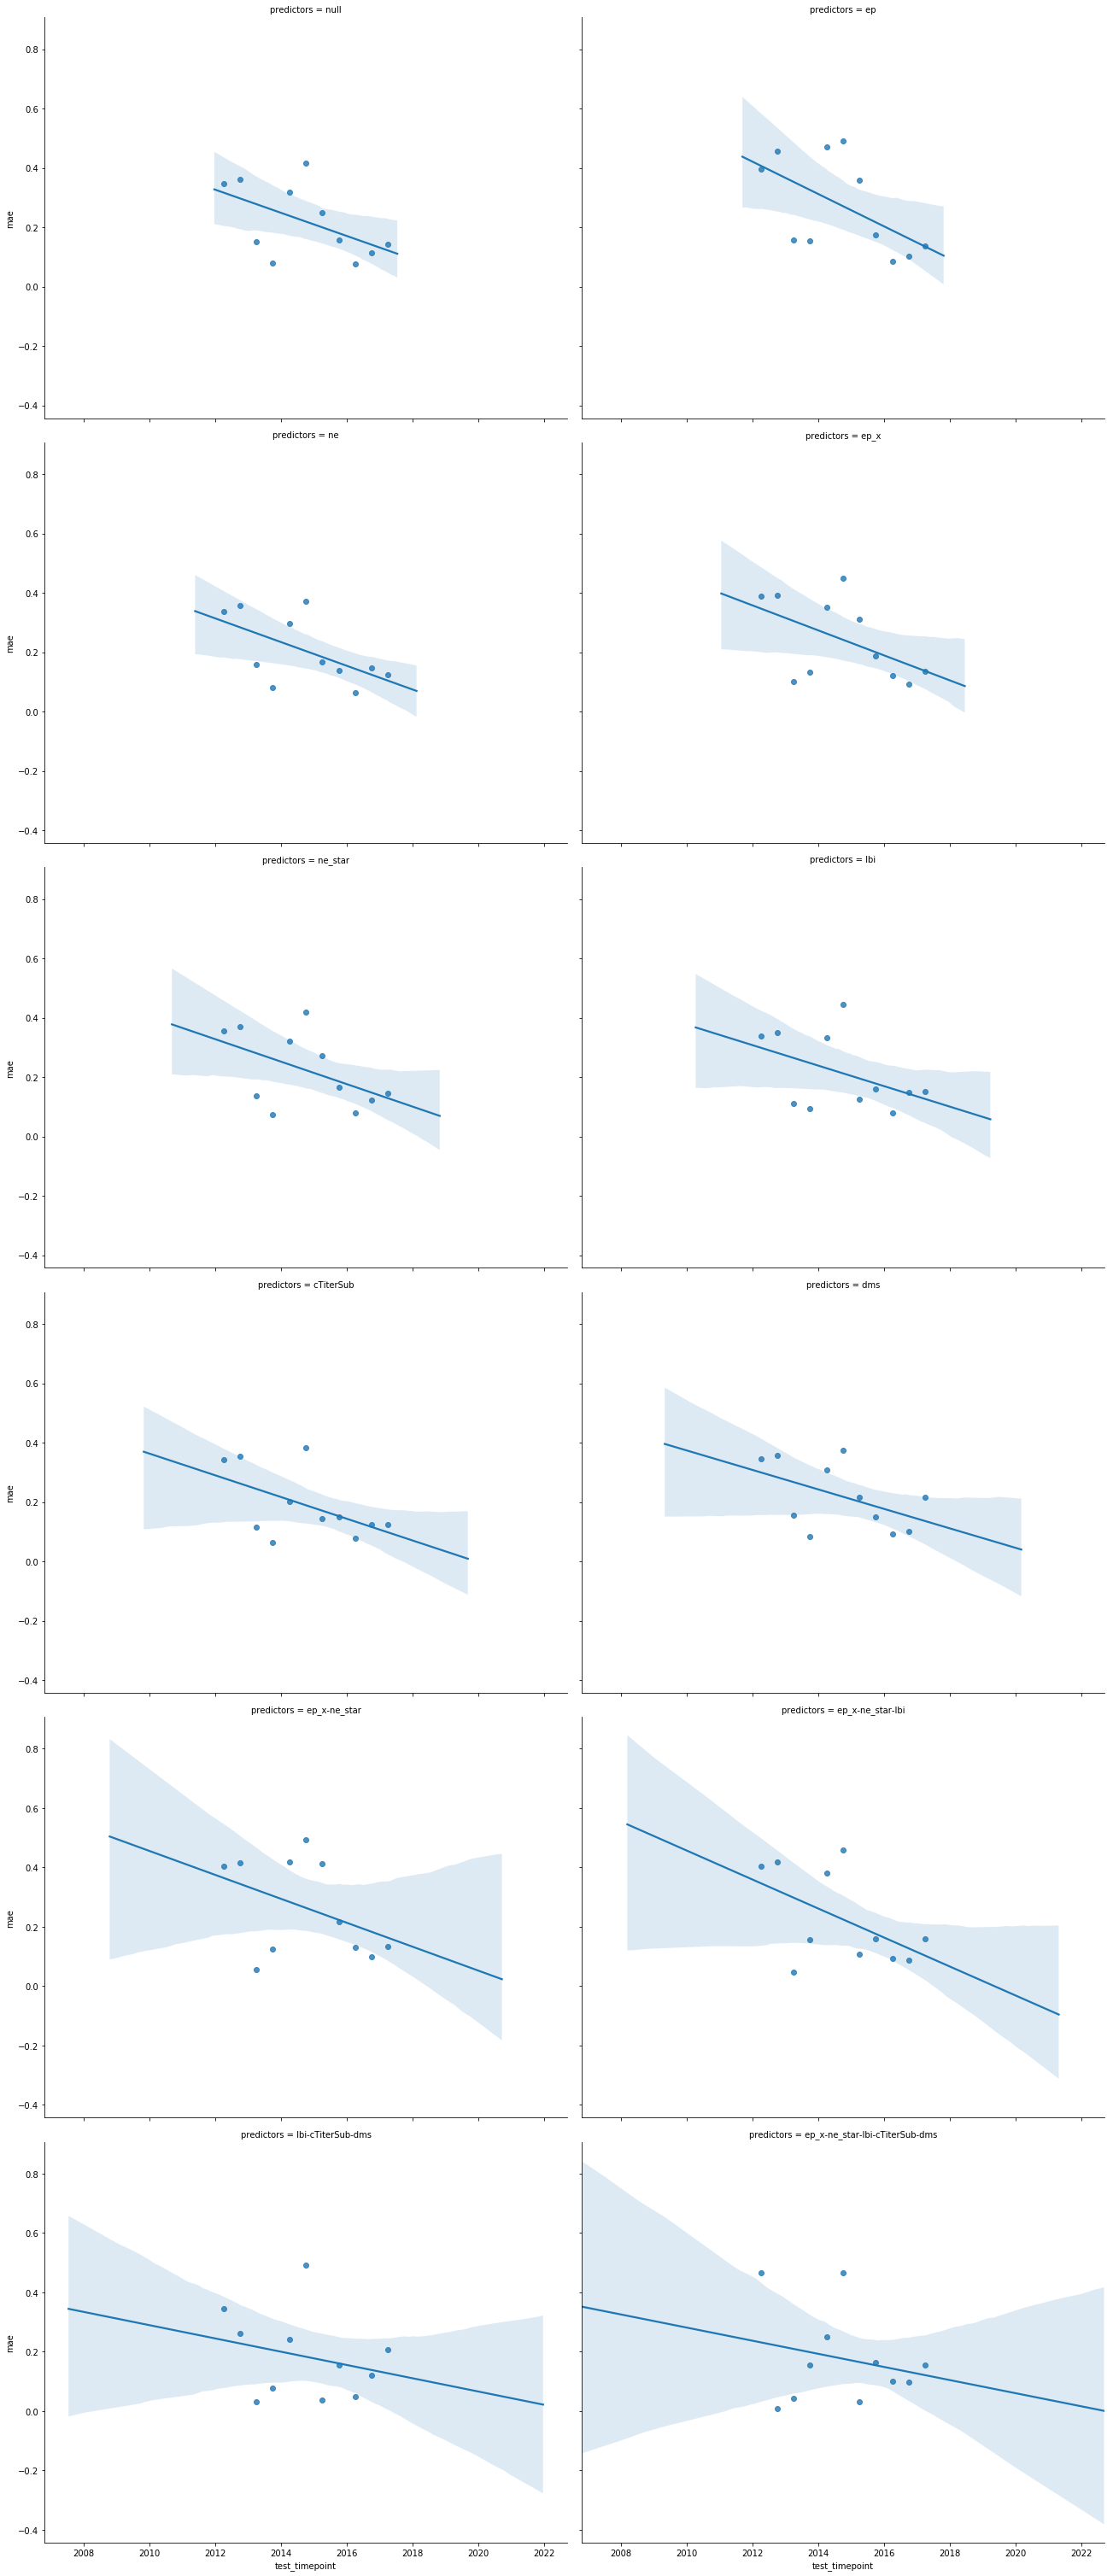

In [161]:
sns.lmplot("test_timepoint", "mae", col="predictors", data=df, col_wrap=2, height=7, aspect=1.3)

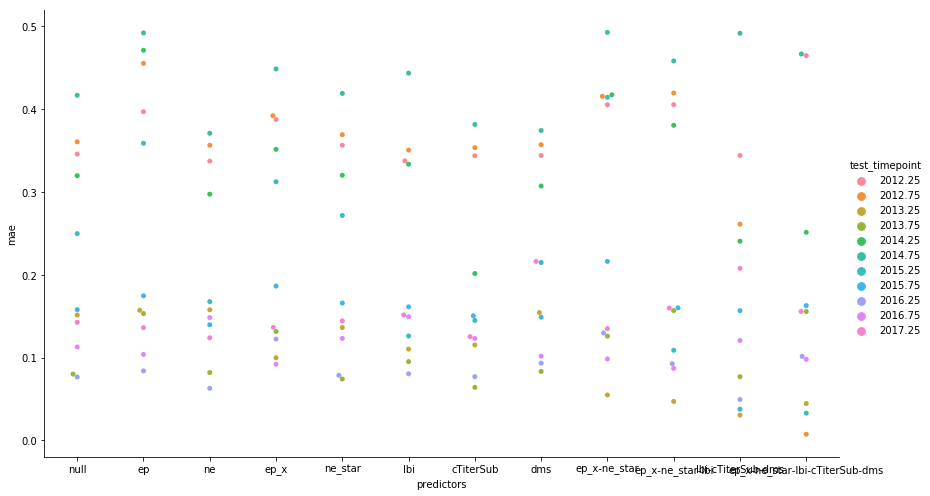

In [162]:
sns.catplot(
    "predictors",
    "mae",
    hue="test_timepoint",
    data=df,
    kind="swarm",
    height=7,
    aspect=1.7
)

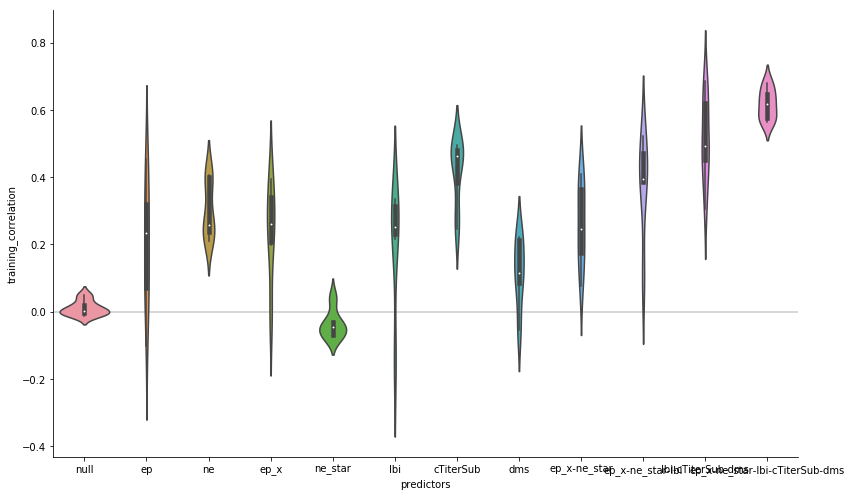

In [163]:
g = sns.catplot(
    "predictors",
    "training_correlation",
    #hue="test_timepoint",
    data=df,
    kind="violin",
    height=7,
    aspect=1.7
)
g.ax.axhline(0, color="#999999", alpha=0.5, zorder=-10)

(-1, 1)

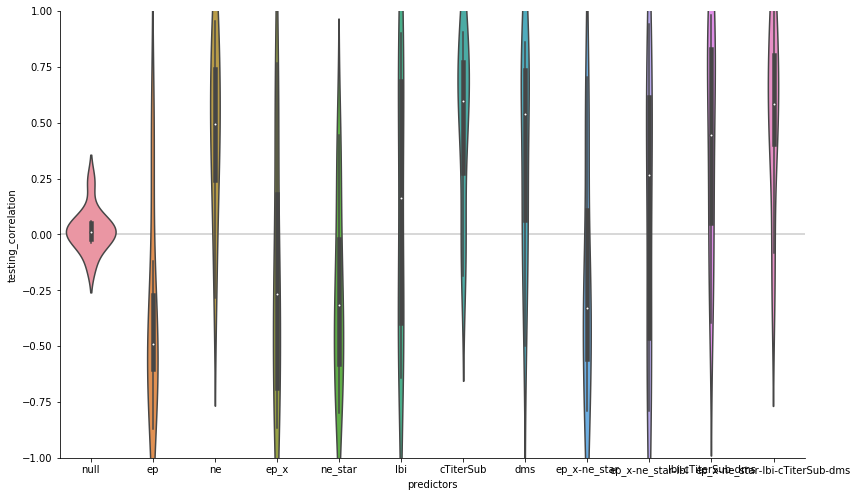

In [164]:
g = sns.catplot(
    "predictors",
    "testing_correlation",
    #hue="test_timepoint",
    data=df,
    kind="violin",
    height=7,
    aspect=1.7
)
g.ax.axhline(0, color="#999999", alpha=0.5, zorder=-10)
g.ax.set_ylim(-1, 1)

(-1, 1)

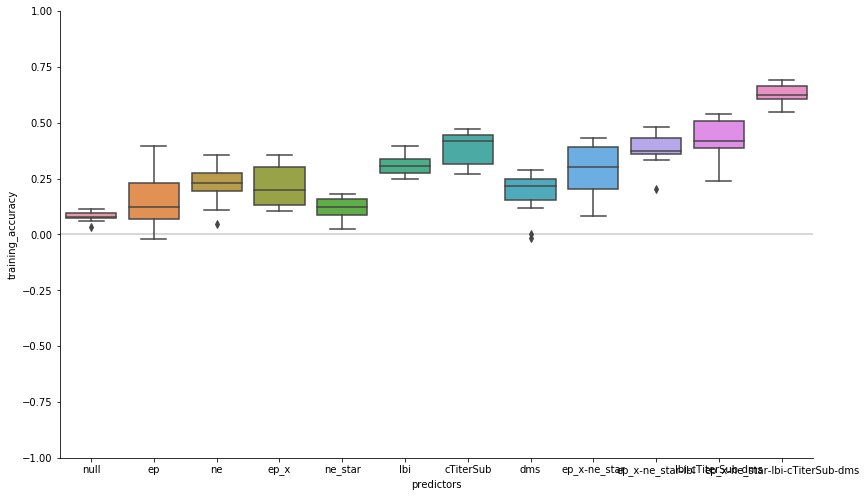

In [165]:
g = sns.catplot(
    "predictors",
    "training_accuracy",
    #hue="test_timepoint",
    data=df,
    kind="box",
    height=7,
    aspect=1.7
)
g.ax.axhline(0, color="#999999", alpha=0.5, zorder=-10)
g.ax.set_ylim(-1, 1)

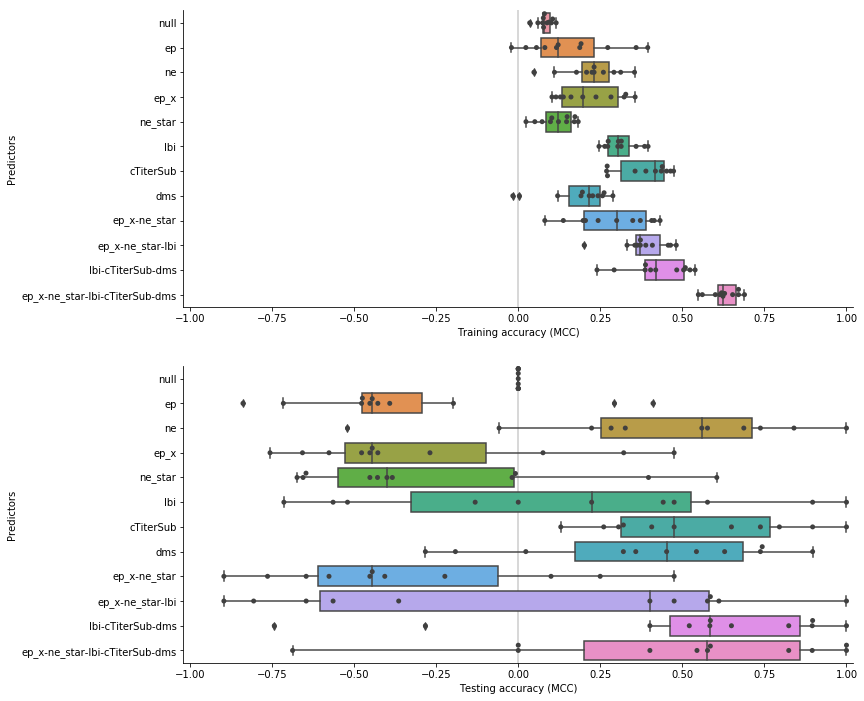

In [166]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training accuracy (MCC)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing accuracy on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing accuracy (MCC)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

(-1.02, 1.02)

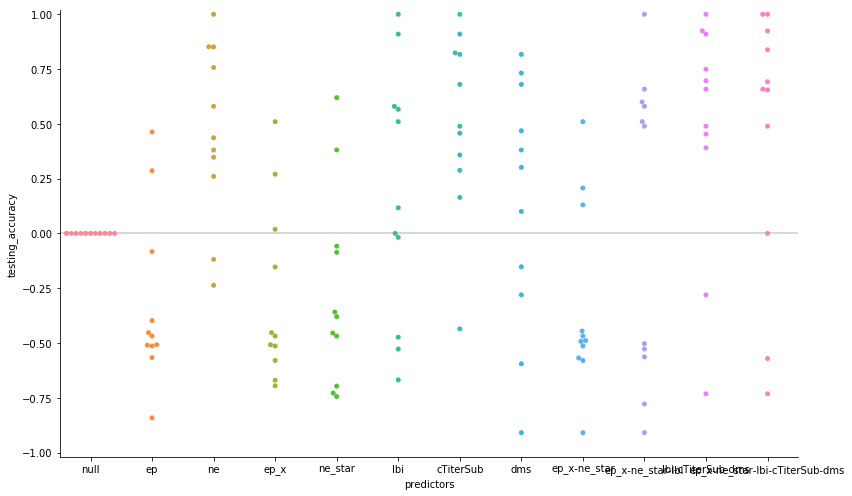

In [100]:
g = sns.catplot(
    "predictors",
    "testing_accuracy",
    #hue="test_timepoint",
    data=df,
    kind="swarm",
    height=7,
    aspect=1.7
)
g.ax.axhline(0, color="#999999", alpha=0.5, zorder=-10)
g.ax.set_ylim(-1.02, 1.02)

In [71]:
df["predictors"].unique()

array(['null', 'ep', 'ne', 'ep_x', 'ne_star', 'lbi', 'cTiterSub', 'dms',
       'ep_x-ne_star', 'ep_x-ne_star-lbi', 'lbi-cTiterSub-dms',
       'ep_x-ne_star-lbi-cTiterSub-dms'], dtype=object)

In [78]:
df

,fn,fp,last_training_timepoint,mae,parameter-cTiterSub,parameter-dms,parameter-ep,parameter-ep_x,parameter-lbi,parameter-ne,...,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,viruses,year_range
0,56,0,2011.25,0.313772,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.25,0.000000,1.463807e-01,54,0,-0.033171,0.115970,9,92,2006-2018
1,0,52,2011.75,0.341732,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.75,0.000000,-8.797131e-17,0,54,-0.032147,0.055582,10,92,2006-2018
2,0,16,2012.25,0.147611,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.25,0.000000,-7.232593e-02,0,64,-0.098761,-0.197422,11,92,2006-2018
3,0,19,2012.75,0.062373,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.75,0.000000,-7.607112e-02,0,52,-0.044048,-0.150579,12,92,2006-2018
4,24,0,2013.25,0.333097,NaN,NaN,NaN,NaN,NaN,NaN,...,2014.25,0.000000,-1.599029e-01,27,0,0.029363,-0.124336,13,92,2006-2018
5,0,40,2013.75,0.456624,NaN,NaN,NaN,NaN,NaN,NaN,...,2014.75,0.000000,NaN,0,25,0.064250,-0.126163,14,92,2006-2018
6,0,23,2014.25,0.247762,NaN,NaN,NaN,NaN,NaN,NaN,...,2015.25,0.000000,-1.826808e-02,0,29,0.058196,-0.165644,15,92,2006-2018
7,0,25,2014.75,0.146357,NaN,NaN,NaN,NaN,NaN,NaN,...,2015.75,0.000000,NaN,0,25,0.046305,-0.032092,16,92,2006-2018
8,0,6,2015.25,0.078331,NaN,NaN,NaN,NaN,NaN,NaN,...,2016.25,0.000000,NaN,0,41,0.051679,-0.034367,17,92,2006-2018
9,0,54,2015.75,0.108051,NaN,NaN,NaN,NaN,NaN,NaN,...,2016.75,0.000000,NaN,0,33,0.052007,-0.034020,18,92,2006-2018


In [79]:
parameter_columns = [column for column in df.columns if column.startswith("parameter-")]
df.loc[:, ["predictors"] + parameter_columns].groupby("predictors").aggregate(["mean", "std"])

parameter-cTiterSub           parameter-dms  \
                                              mean       std          mean   
predictors                                                                   
cTiterSub                                 0.576261  0.333535           NaN   
dms                                            NaN       NaN      0.253746   
ep                                             NaN       NaN           NaN   
ep_x                                           NaN       NaN           NaN   
ep_x-ne_star                                   NaN       NaN           NaN   
ep_x-ne_star-lbi                               NaN       NaN           NaN   
ep_x-ne_star-lbi-cTiterSub-dms            0.972800  0.233975      0.209915   
lbi                                            NaN       NaN           NaN   
lbi-cTiterSub-dms                         0.952180  0.280802      0.080749   
ne                                             NaN       NaN           NaN   
ne_star                                        NaN       NaN           NaN   
null                                           NaN       NaN           NaN   

                                         parameter-ep            \
                                     std         mean       std   
predictors                                                        
cTiterSub                            NaN          NaN       NaN   
dms                             0.282819          NaN       NaN   
ep                                   NaN     0.364159  0.721343   
ep_x                                 NaN          NaN       NaN   
ep_x-ne_star                         NaN          NaN       NaN   
ep_x-ne_star-lbi                     NaN          NaN       NaN   
ep_x-ne_star-lbi-cTiterSub-dms  0.548323          NaN       NaN   
lbi                                  NaN          NaN       NaN   
lbi-cTiterSub-dms               0.630316          NaN       NaN   
ne                                   NaN          NaN       NaN   
ne_star                              NaN          NaN       NaN   
null                                 NaN          NaN       NaN   

                               parameter-ep_x           parameter-lbi  \
                                         mean       std          mean   
predictors                                                              
cTiterSub                                 NaN       NaN           NaN   
dms                                       NaN       NaN           NaN   
ep                                        NaN       NaN           NaN   
ep_x                                 1.001901  0.769374           NaN   
ep_x-ne_star                         1.349370  1.109979           NaN   
ep_x-ne_star-lbi                     0.765137  0.655802      0.577023   
ep_x-ne_star-lbi-cTiterSub-dms       1.215106  0.789754      0.897235   
lbi                                       NaN       NaN      0.399903   
lbi-cTiterSub-dms                         NaN       NaN      0.487347   
ne                                        NaN       NaN           NaN   
ne_star                                   NaN       NaN           NaN   
null                                      NaN       NaN           NaN   

                                         parameter-ne            \
                                     std         mean       std   
predictors                                                        
cTiterSub                            NaN          NaN       NaN   
dms                                  NaN          NaN       NaN   
ep                                   NaN          NaN       NaN   
ep_x                                 NaN          NaN       NaN   
ep_x-ne_star                         NaN          NaN       NaN   
ep_x-ne_star-lbi                0.297438          NaN       NaN   
ep_x-ne_star-lbi-cTiterSub-dms  0.293797          NaN       NaN   
lbi                             0.190598          NaN       NaN   
lbi-cTiterSub-dms    

In [123]:
parameters_df = df.loc[:, ["predictors"] + parameter_columns].melt(
    "predictors",
    parameter_columns,
    var_name="predictor",
    value_name="parameter"
).dropna().copy()

In [126]:
parameters_df["predictor"] = parameters_df["predictor"].str.replace("parameter-", "")

In [127]:
parameters_df.head()

,predictors,predictor,parameter
66,cTiterSub,cTiterSub,-0.002188
67,cTiterSub,cTiterSub,0.020439
68,cTiterSub,cTiterSub,0.205096
69,cTiterSub,cTiterSub,0.638125
70,cTiterSub,cTiterSub,0.687128


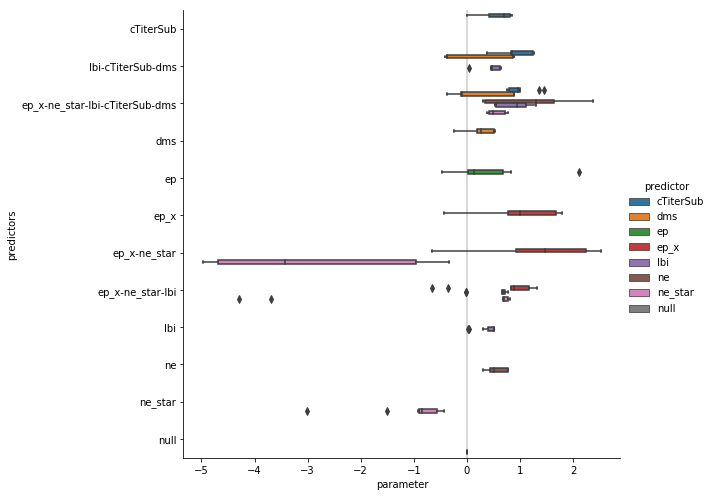

In [132]:
g = sns.catplot(
    y="predictors",
    x="parameter",
    data=parameters_df,
    hue="predictor",
    kind="box",
    height=7,
    aspect=1.3,
    dodge=1
)
g.ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

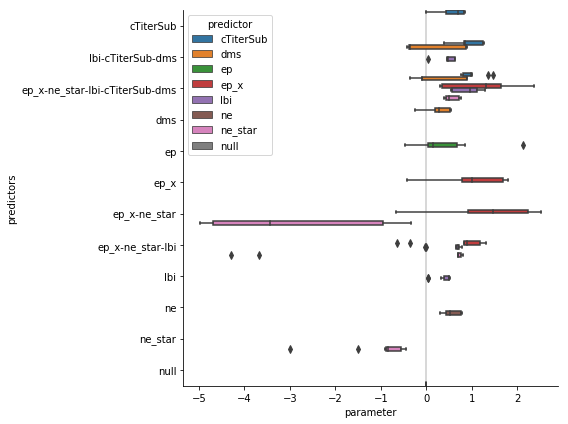

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(
    y="predictors",
    x="parameter",
    data=parameters_df,
    hue="predictor",
    ax=ax,
    width=1.0,
    dodge=1.0
)
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)
sns.despine()
plt.tight_layout()

In [152]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum()

fn    124
fp    110
tn    251
tp    320
dtype: int64

In [153]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum().sum()

805

In [154]:
(251+320) / 805.0

0.7093167701863354

In [155]:
df[df["predictors"] == "cTiterSub"]["testing_accuracy"].mean()

0.5046847156124517

In [156]:
df[df["predictors"] == "cTiterSub"]["testing_accuracy"].median()

0.4892460547900817